In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [57]:
data_source = '../data/raw/raw_data.csv'
data = pd.read_csv(data_source)

In [58]:
print(data.head())

  category                                          rss_title  \
0  biatlon  Krčmář dojel v hromadném závodě devátý, díky s...   
1  biatlon  Česká vlajka byla v Pokljuce vidět i ve štafet...   
2  biatlon     Živě: Stíhací závod biatlonistek v Ruhpoldingu   
3   fotbal  Bakoš dostal herdu do nosu a v zápase plném ka...   
4   fotbal  My moc chtěli a Plzeň moc nechtěla, zní z Ďolí...   

                                           rss_perex  
0  Závod s hromadným startem v německém Oberhofu ...  
1                                            Galerie  
2                                      15. 1., 14:45  
3  Slovenský útočník Marek Bakoš zařídil Plzni gó...  
4  Český fotbal hledá viníka skandálu odloženého ...  


In [59]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111218 entries, 0 to 111217
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   category   111218 non-null  object
 1   rss_title  111218 non-null  object
 2   rss_perex  111218 non-null  object
dtypes: object(3)
memory usage: 2.5+ MB
None


In [60]:
print(data.describe())

       category          rss_title rss_perex
count    111218             111218    111218
unique       24              99524     93319
top      fotbal  Karolína Plíšková   Galerie
freq      45891                102       247


In [61]:
unique_categories = data['category'].unique()
unique_categories.sort()
print(unique_categories)


['atletika' 'baseball' 'basketbal' 'biatlon' 'box' 'cyklistika' 'dostihy'
 'florbal' 'formule1' 'fotbal' 'futsal' 'golf' 'hazena' 'hokej' 'hokejbal'
 'krasobrusleni' 'lyze_snowboard' 'moto' 'olympijske_hry' 'rugby'
 'rychlobrusleni' 'tenis' 'vodni_sporty' 'volejbal']


In [62]:
category_counts = data['category'].value_counts()
print(category_counts)

category
fotbal            45891
hokej             28775
tenis             11437
formule1           5733
moto               4813
atletika           2552
basketbal          2492
cyklistika         2048
biatlon            1526
olympijske_hry     1322
lyze_snowboard      957
volejbal            838
hazena              666
vodni_sporty        601
florbal             527
golf                455
box                 149
baseball            143
krasobrusleni        77
rychlobrusleni       65
dostihy              56
rugby                46
futsal               43
hokejbal              6
Name: count, dtype: int64


In [63]:
def plot_histogram(data, column_name):
    temp_data = data.copy()
    
    column_name_length = f'{column_name}_length'
    temp_data[column_name_length] = temp_data[column_name].str.len()

    plt.figure(figsize=(10, 6))
    plt.hist(temp_data[column_name_length], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of Lengths of {column_name}')
    plt.xlabel(f'Length of {column_name}')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [64]:
def print_data_infos(data, column_name):
    # Calculate the lengths of titles without generating a warning
    data['length'] = data[column_name].str.len()

    # Find the shortest and longest title lengths directly
    shortest_title = data['length'].min()
    longest_title = data['length'].max()

    # Calculate the percentiles
    percentiles = data['length'].quantile([0.05, 0.5, 0.95])

    print(f"Length of shortest {column_name}: {shortest_title}")
    print(f"Length of longest {column_name}: {longest_title}")
    print("Percentiles:")
    print(percentiles)

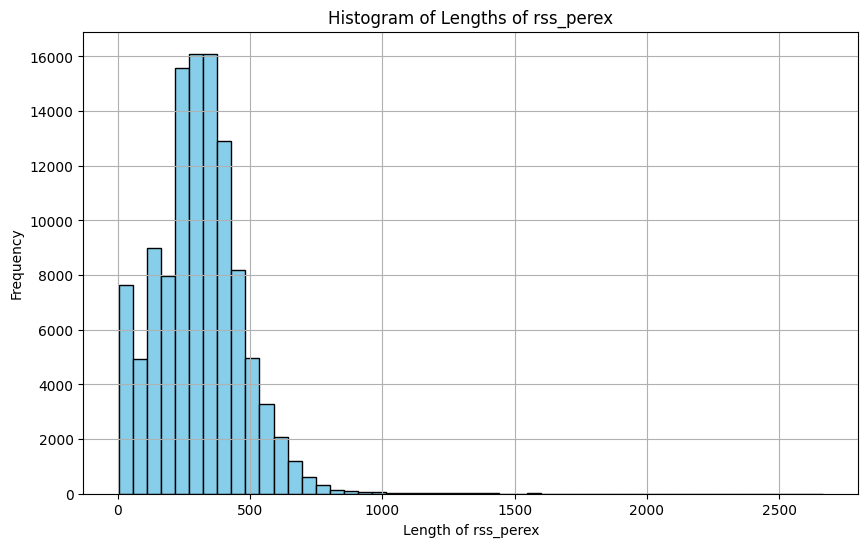

Length of shortest rss_perex: 3
Length of longest rss_perex: 2666
Percentiles:
0.05     35.0
0.50    304.0
0.95    570.0
Name: length, dtype: float64


In [65]:
plot_histogram(data, 'rss_perex')
print_data_infos(data, 'rss_perex')

105102


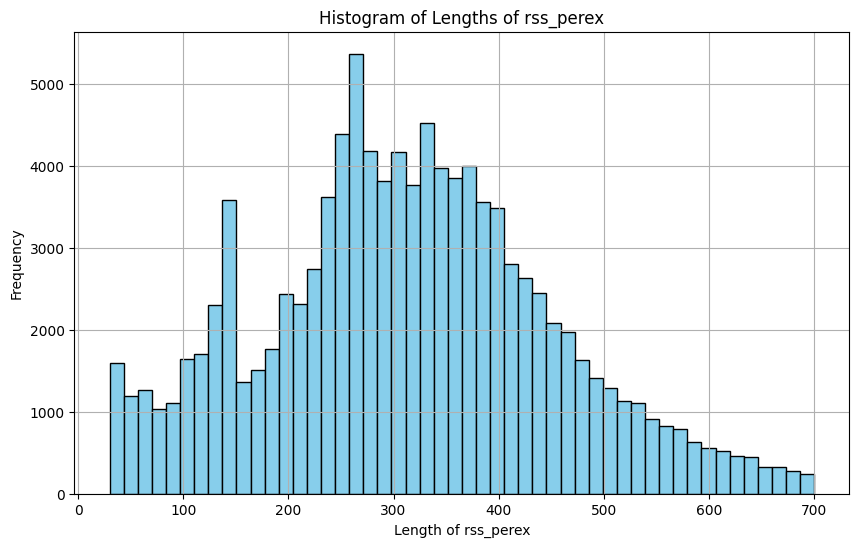

In [66]:
min_length = 30
max_length = 700
filtered_data = data[(data['length'] >= min_length) & (data['length'] <= max_length)]
print(len(filtered_data))
plot_histogram(filtered_data, 'rss_perex')

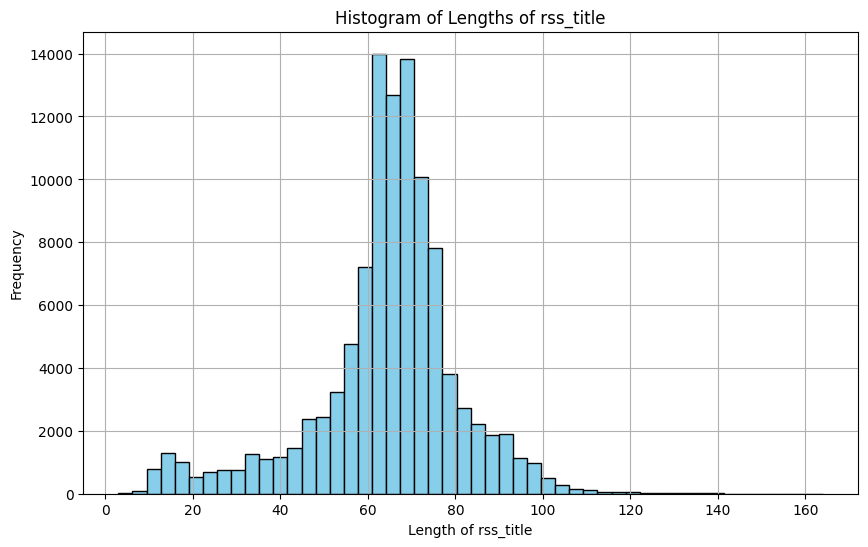

Length of shortest rss_title: 3
Length of longest rss_title: 164
Percentiles:
0.05    29.0
0.50    66.0
0.95    89.0
Name: length, dtype: float64


/tmp/ipykernel_592/4135337026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length'] = data[column_name].str.len()


In [67]:
plot_histogram(filtered_data, 'rss_title')
print_data_infos(filtered_data, 'rss_title')


102252


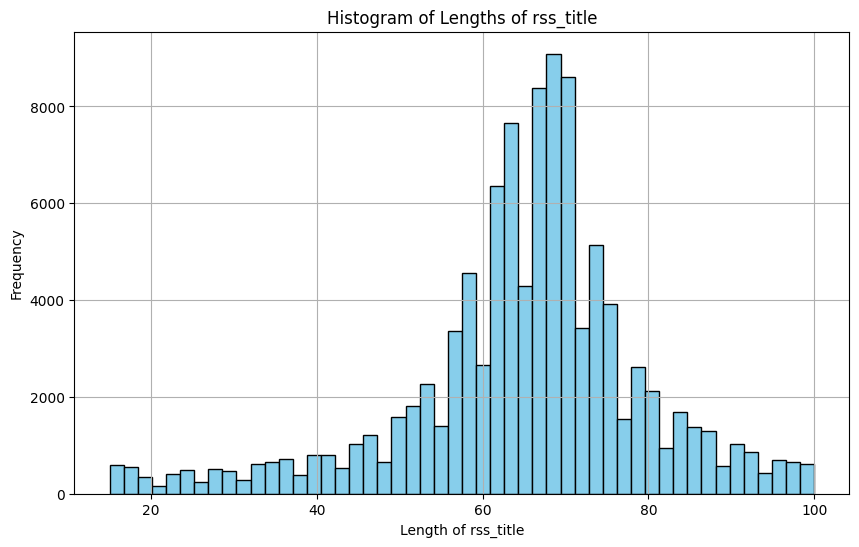

In [68]:
min_title_length = 15
max_title_length = 100
filtered_data = filtered_data[(filtered_data['length'] >= min_title_length) & (filtered_data['length'] <= max_title_length)]
print(len(filtered_data))
plot_histogram(filtered_data, 'rss_title')

In [69]:
filtered_data['text'] = filtered_data['rss_title'] + ' ' + filtered_data['rss_perex']
# Select the relevant columns
selected_data = filtered_data[['text', 'category']].copy()
# Encode the 'category' column and start the codes from 0
selected_data['label'] = selected_data['category'].astype('category').cat.codes
# Shift the codes by the minimum value to ensure they start from 0
selected_data.loc[:, 'label'] -= selected_data['label'].min()
print(selected_data.head())


                                                text category  label
0  Krčmář dojel v hromadném závodě devátý, díky s...  biatlon      3
3  Bakoš dostal herdu do nosu a v zápase plném ka...   fotbal      9
4  My moc chtěli a Plzeň moc nechtěla, zní z Ďolí...   fotbal      9
5  Novou sezonu otevře zápas Brna s nováčkem Ostr...   fotbal      9
6  S Radou už Sparta moc nepočítá. Kotalík hledá ...   fotbal      9


In [70]:
labels = selected_data[['label','category']]
unique_data = labels.drop_duplicates()
sorted_data = unique_data.sort_values(by='label')
sorted_data = sorted_data.rename(columns={'label': 'id', 'category': 'label'})
sorted_data.to_csv('../labels/labels.csv', index=False)

In [71]:
# Drop the 'category' column
result = selected_data.drop('category', axis=1)

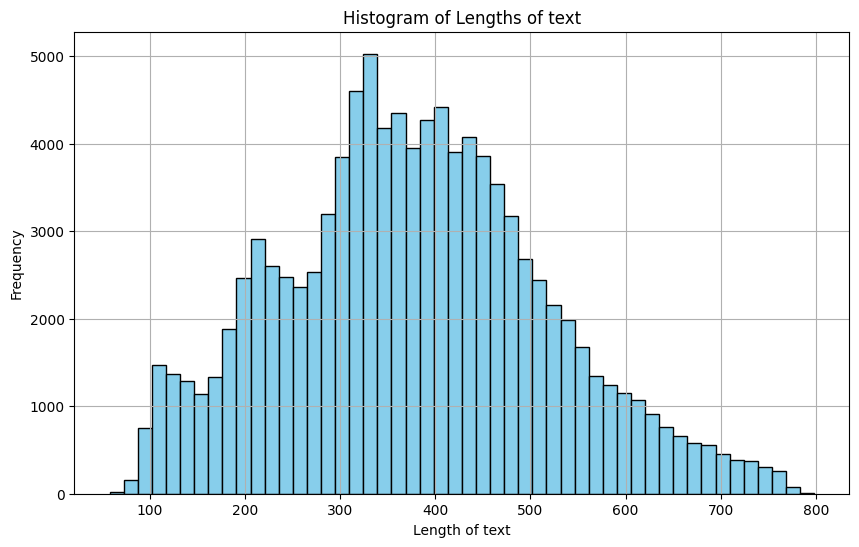

In [72]:
plot_histogram(result, 'text')

In [73]:
print_data_infos(result, 'text')

Length of shortest text: 58
Length of longest text: 798
Percentiles:
0.05    147.0
0.50    373.0
0.95    624.0
Name: length, dtype: float64


In [74]:
print(result.head())

                                                text  label  length
0  Krčmář dojel v hromadném závodě devátý, díky s...      3     359
3  Bakoš dostal herdu do nosu a v zápase plném ka...      9     146
4  My moc chtěli a Plzeň moc nechtěla, zní z Ďolí...      9     185
5  Novou sezonu otevře zápas Brna s nováčkem Ostr...      9     133
6  S Radou už Sparta moc nepočítá. Kotalík hledá ...      9     235


In [75]:
result = result[['text', 'label']]

In [76]:
unique_values = result['label'].unique()
print(unique_values)

[ 3  9 13  0  5 21  8 17 23  2  7 18 16  4  1 11 12 22 15  6 19 20 10 14]


In [77]:
train_data, test_data = train_test_split(result, test_size=0.15, random_state=42)

# Extract unique values
train_unique_values = train_data['label'].unique()
test_unique_values = test_data['label'].unique()


# Sort the unique values
sorted_train_unique_values = np.sort(train_unique_values)
sorted_test_unique_values = np.sort(test_unique_values)

print(sorted_train_unique_values)
print(sorted_test_unique_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [78]:
train_data.to_csv('../data/processed/train.csv', index=False,encoding='utf-8')
test_data.to_csv('../data/processed/test.csv', index=False,encoding='utf-8')